# Unilever Data Science POC Use Case
**Problem Definition:** One of our brands is going through some major changes in business execution plans and
will like to know.

1.  What are the major drivers for sales(EQ)?

### Approach to find the Major Drivers:

- Train.csv which is a Daywise Data is used for building the model to calculate the feature importance.
- The feature importance of a best performing model is calaculated to analyse the major drivers of EQ sales.

## Dictionary
1. Day                                   
2. EQ                                    
3. Social_Search_Impressions             
4. Social_Search_Working_cost            
5. Digital_Impressions                   
6. Digital_Working_cost                 
7. Print_Impressions.Ads40               
8. Print_Working_Cost.Ads50              
9. OOH_Impressions                   
10. OOH_Working_Cost                    
11. SOS_pct                             
12. Digital_Impressions_pct               
13. CCFOT                                    
14. Median_Temp                              
15. Median_Rainfall                      
16. Fuel_Price                            
17. Inflation                           
18. Trade_Invest                        
19. Brand_Equity                          
20. Avg_EQ_Price                           
21. Any_Promo_pct_ACV                   
22. Any_Feat_pct_ACV                     
23. Any_Disp_pct_ACV                     
24. EQ_Base_Price                          
25. Est_ACV_Selling                       
26. pct_ACV                               
27. Avg_no_of_Items                       
28. pct_PromoMarketDollars_Category       
29. RPI_Category                           
30. Magazine_Impressions_pct               
31. TV_GRP                                
32. Competitor1_RPI                       
33. Competitor2_RPI                      
34. Competitor3_RPI                         
35. Competitor4_RPI                      
36. EQ_Category                           
37. EQ_Subcategory                        
38. pct_PromoMarketDollars_Subcategory     
39. RPI_Subcategory                      

# Import Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os

%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 8]
plt.style.use("fivethirtyeight")

import warnings
warnings.simplefilter('ignore')

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error


# Regression
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor

import xgboost as xgb
import lightgbm as lgb
import catboost as cat

## Import the Dataset 

In [2]:
train = pd.read_csv("Training-Data-Sets - NEWDATA.csv")
test = pd.read_excel("Test dataset v1.xlsx")

In [3]:
print(train.shape)
print(test.shape)

(12000, 39)
(39, 39)


In [4]:
train.head()

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,1,718.458667,22256928,56812,7724107,238700,151438,1044,112229070,2133614,...,54.17,16.46,105.71,36.13,46.36,71.83,5420048,475559,0.3766,45.77
1,2,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,...,65.79,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02
2,3,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,...,45.08,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22
3,4,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,...,75.24,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10
4,5,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,...,56.85,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16


In [7]:
test.head()

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,2019283.0,5493.0,37148.2,2045.282,0.000012,0.000012,1.203045e+09,2220633.0,...,27.702433,21.300,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,4564738.0,12938.0,50886.8,2370.584,0.000014,0.000015,1.944356e+09,469895.0,...,21.432628,12.334,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,1029384.0,6546.0,253333.2,3180.888,0.000016,0.000017,9.984054e+08,4465061.0,...,29.726275,23.213,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,902938.0,3928.0,3426239.0,13595.398,0.000016,0.000019,3.039816e+09,1031855.0,...,30.326275,14.456,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,1343454.0,28374.0,552197.8,3983.134,0.000016,0.000019,9.622004e+08,2842722.0,...,31.702433,25.300,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [8]:
train.nunique()

Day                                   12000
EQ                                    12000
Social_Search_Impressions             11997
Social_Search_Working_cost            11442
Digital_Impressions                   11997
Digital_Working_cost                  11819
Print_Impressions.Ads40               11774
Print_Working_Cost.Ads50              11621
OOH_Impressions                       12000
OOH_Working_Cost                      11987
SOS_pct                                  50
Digital_Impressions_pct                  50
CCFOT                                    90
Median_Temp                              47
Median_Rainfall                       11293
Fuel_Price                             2565
Inflation                             11419
Trade_Invest                           6865
Brand_Equity                            159
Avg_EQ_Price                           1778
Any_Promo_pct_ACV                      8542
Any_Feat_pct_ACV                        401
Any_Disp_pct_ACV                

In [31]:
train.columns

Index(['Day', 'EQ', 'Social_Search_Impressions', 'Social_Search_Working_cost',
       'Digital_Impressions', 'Digital_Working_cost',
       'Print_Impressions.Ads40', 'Print_Working_Cost.Ads50',
       'OOH_Impressions', 'OOH_Working_Cost', 'SOS_pct',
       'Digital_Impressions_pct', 'CCFOT', 'Median_Temp', 'Median_Rainfall',
       'Fuel_Price', 'Inflation', 'Trade_Invest', 'Brand_Equity',
       'Avg_EQ_Price', 'Any_Promo_pct_ACV', 'Any_Feat_pct_ACV',
       'Any_Disp_pct_ACV', 'EQ_Base_Price', 'Est_ACV_Selling', 'pct_ACV',
       'Avg_no_of_Items', 'pct_PromoMarketDollars_Category', 'RPI_Category',
       'Magazine_Impressions_pct', 'TV_GRP', 'Competitor1_RPI',
       'Competitor2_RPI', 'Competitor3_RPI', 'Competitor4_RPI', 'EQ_Category',
       'EQ_Subcategory', 'pct_PromoMarketDollars_Subcategory',
       'RPI_Subcategory'],
      dtype='object')

## Metric Functions

In [60]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [34]:
def metric_lgb(y_pred, data):
    y_true = data.get_label()
    result = mean_absolute_percentage_error(y_true, y_pred)

    return 'mape', result, False

In [39]:
target = 'EQ'
features = list(set(train.columns)-set(['EQ']))

In [40]:
print(len(features))
features

38


['EQ_Subcategory',
 'Social_Search_Impressions',
 'Trade_Invest',
 'Any_Feat_pct_ACV',
 'Social_Search_Working_cost',
 'RPI_Subcategory',
 'Brand_Equity',
 'Competitor2_RPI',
 'Inflation',
 'Median_Temp',
 'Magazine_Impressions_pct',
 'pct_PromoMarketDollars_Subcategory',
 'Avg_no_of_Items',
 'Day',
 'Print_Working_Cost.Ads50',
 'Competitor4_RPI',
 'pct_PromoMarketDollars_Category',
 'Print_Impressions.Ads40',
 'RPI_Category',
 'Digital_Working_cost',
 'Est_ACV_Selling',
 'EQ_Category',
 'Digital_Impressions',
 'Any_Promo_pct_ACV',
 'Median_Rainfall',
 'SOS_pct',
 'OOH_Impressions',
 'Digital_Impressions_pct',
 'pct_ACV',
 'Any_Disp_pct_ACV',
 'Competitor1_RPI',
 'Fuel_Price',
 'Avg_EQ_Price',
 'OOH_Working_Cost',
 'TV_GRP',
 'Competitor3_RPI',
 'CCFOT',
 'EQ_Base_Price']

In [41]:
train[features].dtypes

EQ_Subcategory                          int64
Social_Search_Impressions               int64
Trade_Invest                            int64
Any_Feat_pct_ACV                      float64
Social_Search_Working_cost              int64
RPI_Subcategory                       float64
Brand_Equity                          float64
Competitor2_RPI                       float64
Inflation                             float64
Median_Temp                             int64
Magazine_Impressions_pct              float64
pct_PromoMarketDollars_Subcategory    float64
Avg_no_of_Items                       float64
Day                                     int64
Print_Working_Cost.Ads50                int64
Competitor4_RPI                       float64
pct_PromoMarketDollars_Category       float64
Print_Impressions.Ads40                 int64
RPI_Category                          float64
Digital_Working_cost                    int64
Est_ACV_Selling                         int64
EQ_Category                       

# Baseliner

In [61]:
def baseliner(train, features, target, cv=3, metric=make_scorer(mean_absolute_percentage_error, greater_is_better=False)):
    print("Baseliner Models(All)")
    eval_dict = {}
    models = [
        KNeighborsRegressor(), GaussianNB(), 
        lgb.LGBMRegressor(), ExtraTreesRegressor(), xgb.XGBRegressor(objective='reg:squarederror'), 
        cat.CatBoostRegressor(verbose=0), GradientBoostingRegressor(), RandomForestRegressor(), 
        LinearRegression(), DecisionTreeRegressor(), ExtraTreeRegressor(), AdaBoostRegressor(), 
        BaggingRegressor(), ElasticNet(), Lasso(), Ridge(), 
        ] #SVR(),
    
    print("sklearn Model Name  \t  CV")
    print("--" * 50)

    for index, model in enumerate(models, 0):
        model_name = str(model).split("(")[0]
        eval_dict[model_name] = {}

        results = cross_val_score(model, train[features], train[target], cv=cv, scoring=metric)
        eval_dict[model_name]['cv'] = -results.mean()

        print("%s \t %.4f \t" % (
            model_name[:21], eval_dict[model_name]['cv']))

In [62]:
baseliner(train, features, target, cv=3, metric=make_scorer(mean_absolute_percentage_error, False))

Baseliner Models(All)
sklearn Model Name  	  CV
----------------------------------------------------------------------------------------------------
KNeighborsRegressor 	 1802.2332 	
GaussianNB 	 nan 	
LGBMRegressor 	 359.7219 	
ExtraTreesRegressor 	 156.6751 	
XGBRegressor 	 555.7041 	
<catboost.core.CatBoo 	 216.3297 	
GradientBoostingRegre 	 1270.6983 	
RandomForestRegressor 	 260.1800 	
LinearRegression 	 5644.4826 	
DecisionTreeRegressor 	 180.7072 	
ExtraTreeRegressor 	 218.9788 	
AdaBoostRegressor 	 5125.1377 	
BaggingRegressor 	 233.6558 	
ElasticNet 	 2153.2486 	
Lasso 	 5464.7172 	
Ridge 	 5511.5622 	


### Some of the best performing models
1. ExtraTreesRegressor
2. DecisionTrees
3. BaggingRegressor
4. CatRegressor
5. RandomForest 

## StandardScaling

In [73]:
scaler = StandardScaler()
X = scaler.fit_transform(train[features])
y = train[target]

In [82]:
def baselinerNorm(X, y,cv=3, metric=make_scorer(mean_absolute_percentage_error, greater_is_better=False)):
    print("Baseliner Models(All)")
    eval_dict = {}
    models = [
        KNeighborsRegressor(), GaussianNB(), 
        lgb.LGBMRegressor(), ExtraTreesRegressor(), xgb.XGBRegressor(objective='reg:squarederror'), 
        cat.CatBoostRegressor(verbose=0), GradientBoostingRegressor(), RandomForestRegressor(), 
        LinearRegression(), DecisionTreeRegressor(), ExtraTreeRegressor(), AdaBoostRegressor(), 
        BaggingRegressor(), ElasticNet(), Lasso(), Ridge(), 
        ] #SVR(),
    
    print("sklearn Model Name  \t  CV")
    print("--" * 50)

    for index, model in enumerate(models, 0):
        model_name = str(model).split("(")[0]
        eval_dict[model_name] = {}

        results = cross_val_score(model, X, y, cv=cv, scoring=metric)
        eval_dict[model_name]['cv'] = -results.mean()

        print("%s \t %.4f \t" % (
            model_name[:21], eval_dict[model_name]['cv']))

In [83]:
baselinerNorm(X, y, cv=3, metric=make_scorer(mean_absolute_percentage_error, False))

Baseliner Models(All)
sklearn Model Name  	  CV
----------------------------------------------------------------------------------------------------
KNeighborsRegressor 	 640.2778 	
GaussianNB 	 nan 	
LGBMRegressor 	 399.5259 	
ExtraTreesRegressor 	 159.3306 	
XGBRegressor 	 555.6683 	
<catboost.core.CatBoo 	 216.3319 	
GradientBoostingRegre 	 1269.5292 	
RandomForestRegressor 	 233.3909 	
LinearRegression 	 5644.4826 	
DecisionTreeRegressor 	 212.3217 	
ExtraTreeRegressor 	 194.5856 	
AdaBoostRegressor 	 5227.4172 	
BaggingRegressor 	 277.5543 	
ElasticNet 	 2938.0356 	
Lasso 	 5606.0412 	
Ridge 	 5643.4292 	


Note: Scaling the features did not improve the models

## Splitting the Data into train and test

In [ ]:
trainX, validX = train_test_split(train, test_size=0.2, shuffle=False, random_state=13)
print("Train Shape : {}\nValid Shape : {}".format(trainX.shape, validX.shape))

### Prediction 

In [185]:
# Fitting the Model and Prediction
etr = ExtraTreesRegressor(random_state=7)
etr.fit(trainX[features],trainX[target])
y_pred_etr = etr.predict(validX[features])

In [188]:
validX['EQ_predicted'] = y_pred_etr
mean_absolute_percentage_error(validX['EQ'],validX['EQ_predicted'])

148.8253040732517

## Plot the feature Importance

In [239]:
def plot_feature_importance(model,features):
    feat_importances = pd.DataFrame({'Features':features,'Importance':model.feature_importances_})
    feat_importances.sort_values(['Importance'],ascending=False,inplace=True)
    sns.set(style="whitegrid")
    ax = sns.barplot(x="Importance", y="Features", orient='h', data=feat_importances)

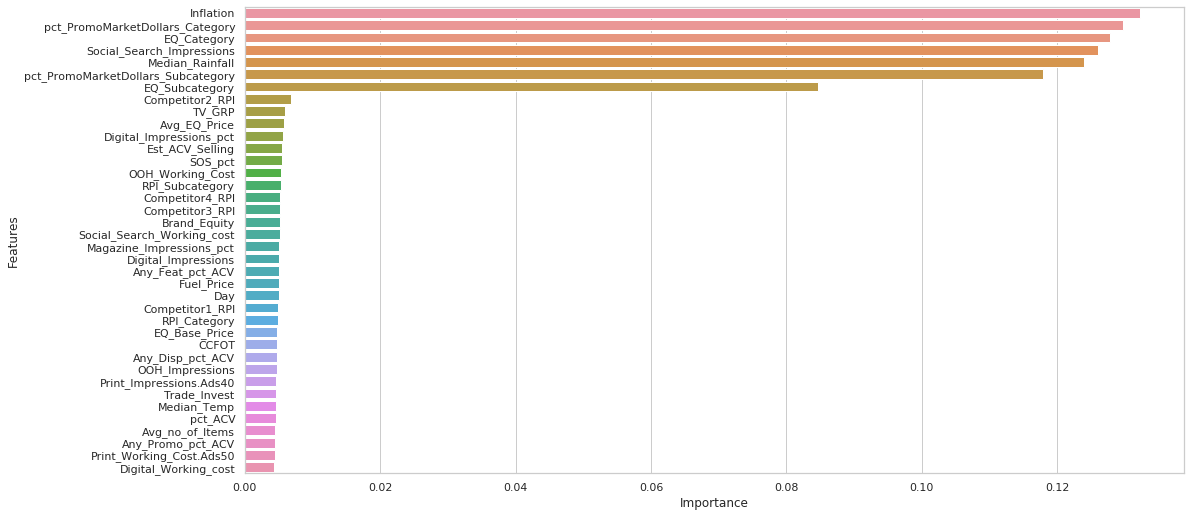

In [240]:
plot_feature_importance(br,features)

## Major Divers of the EQ Sales by Considering the DayWise the Data
1. Inflation
2. pct_PromoMarketDollars_Category
3. EQ_Category
4. Social_Search_Impressions	
5. Median_Rainfall
6. pct_PromoMarketDollars_Subcategory
7. EQ_Subcategory	

The feature importance of the above **7 features** is **very high** compared to the rest of the features.